In [513]:
#importing libraries
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline


In [514]:
#loading the entire excel file into a pandas dataframe
df = pandas.read_excel("NBAStatsL2S.xlsx")

In [515]:
df

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,TOV%,ORB%,FT/FGA,eFG%2,TOV%2,DRB%,FT/FGA2,Arena,Attend.,Attend./G
0,1,Atlanta Hawks*,82,240.3,41.5,88.3,0.470,12.9,34.4,0.374,...,10.8,23.0,0.205,0.543,11.5,76.9,0.177,State Farm Arena,672742.0,16408.0
1,2,Boston Celtics*,82,242.7,40.7,87.4,0.466,13.2,37.1,0.356,...,12.4,24.0,0.195,0.502,12.5,77.3,0.183,TD Garden,727928.0,17754.0
2,3,Brooklyn Nets*,82,240.9,42.0,88.4,0.475,11.5,31.7,0.361,...,12.5,23.9,0.198,0.521,11.7,75.1,0.201,Barclays Center,711539.0,17355.0
3,4,Charlotte Hornets,82,242.4,42.8,91.4,0.468,13.9,38.2,0.365,...,11.6,23.3,0.173,0.544,13.1,74.8,0.187,Spectrum Center,700755.0,17092.0
4,5,Chicago Bulls*,82,240.6,41.7,86.9,0.480,10.6,28.8,0.369,...,11.8,20.4,0.201,0.541,11.9,78.3,0.199,United Center,856148.0,20882.0
5,6,Cleveland Cavaliers,82,240.6,39.7,84.6,0.469,11.6,32.8,0.355,...,13.2,24.0,0.198,0.520,12.3,76.5,0.172,Rocket Mortgage Fieldhouse,758228.0,18493.0
6,7,Dallas Mavericks*,82,240.9,39.3,85.1,0.461,13.1,37.4,0.350,...,11.7,21.3,0.192,0.521,12.2,78.0,0.185,American Airlines Center,808037.0,19708.0
7,8,Denver Nuggets*,82,241.5,41.7,86.3,0.483,12.7,35.9,0.353,...,13.2,21.9,0.194,0.537,11.7,78.3,0.188,Ball Arena,695262.0,16958.0
8,9,Detroit Pistons,82,241.2,38.2,88.6,0.431,11.3,34.6,0.326,...,12.6,23.4,0.194,0.541,13.1,75.6,0.226,Little Caesars Arena,663556.0,16184.0
9,10,Golden State Warriors*,82,240.6,40.5,86.4,0.469,14.3,39.4,0.364,...,13.5,22.8,0.181,0.509,13.0,78.7,0.201,Chase Center,740624.0,18064.0


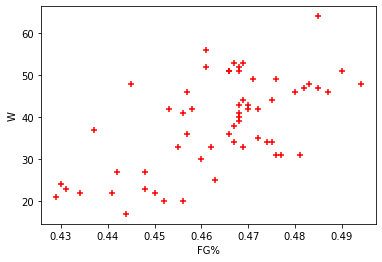

In [516]:
#plot any individual variable against wins
x = 'FG%'
y = 'W'
plt.xlabel(x)
plt.ylabel(y)
plt.scatter(df[x], df[y], color = 'red', marker = '+')

In [517]:
#converting the wins column to a numpy array
y = df['W'].to_numpy()

In [518]:
y

array([43, 51, 44, 43, 46, 44, 52, 48, 23, 53, 20, 25, 42, 33, 56, 53, 51,
       46, 36, 37, 24, 22, 51, 64, 27, 30, 34, 48, 49, 35, 41, 36, 48, 33,
       31, 22, 42, 47, 20, 39, 17, 34, 47, 42, 38, 40, 46, 23, 31, 41, 22,
       21, 49, 51, 42, 31, 33, 27, 52, 34])

In [537]:
#selecting some stats and converting the x variables into a numpy array
#Note: any other features can be used
X = df[['eFG%', 'TS%', 'Pace', '3P%']].to_numpy()

In [578]:
#splits the training and testing split using sklearn

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_test,y_test,test_size=0.5, random_state=1)


In [586]:
#function to evaluate the training/testing errors
def evalerror(y, yhat):
    m = len(y)
    err = 0
    for i in range(m):
        err += (yhat[i] - y[i])**2
    err /= (2*m)
    return err

In [587]:
#setting the polynomial degree and the regularization parameter
degree = 5

lambda1 = .005

In [588]:
#Creates the object for polynomial features and for standardization scaling
poly = PolynomialFeatures(degree, include_bias=False)
scaler = StandardScaler()

#model creation
model = Ridge(lambda1)

    

In [589]:

#converting x_train to polynomials, scaling it, and fitting the model
X_train_mapped = poly.fit_transform(X_train)
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
model.fit(X_train_mapped_scaled, y_train)



Ridge(alpha=0.005)

In [590]:
#predict function
def predict(x):
    #convert x to polynomials
    x_mapped = poly.transform(x)
    #scaling x
    x_mapped_scaled = scaler.transform(x_mapped)
    yhat = model.predict(x_mapped_scaled)
    return yhat

In [591]:
#predict on training data, find error
yhat = predict(X_train)
err_train = evalerror(y_train, yhat)

#predict on cross validation set, find error
yhat = predict(X_cv)
err_cv = evalerror(y_cv, yhat)

# predict on test data, find error
yhat = predict(X_test)
err_test = evalerror(y_test, yhat)

In [592]:
print(f"training err {err_train:0.2f}, cv error {err_cv:0.2f}, test err {err_test:0.2f}")

training err 28.47, cv error 23.96, test err 26.94
